# 📈 Advanced Mann-Kendall Trend Test in Python

This notebook is designed to give a comprehensive understanding of the Mann-Kendall trend test through a real-world time series dataset. We will:

- Load and explore a climate dataset
- Understand hypothesis testing concepts
- Perform pre-processing
- Visualize trends
- Compute the Mann-Kendall test manually and using libraries
- Interpret results statistically

---

## 🔍 Step 1: Load Dataset
We'll use the `seaborn` climate-related dataset (`flights`) to simulate monthly or yearly time series data. You can replace this with rainfall, temperature, or discharge time series as needed.

In [1]:
import seaborn as sns
import pandas as pd

# Load dataset
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## 🛠️ Step 2: Prepare Time Series
Group by year and get the total number of passengers to simulate a trend over time.

In [3]:
# Aggregate by year
yearly = flights.groupby("year")["passengers"].sum().reset_index()
yearly

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


## 📊 Step 3: Plot Time Series
Visualize the data to identify visible trends.

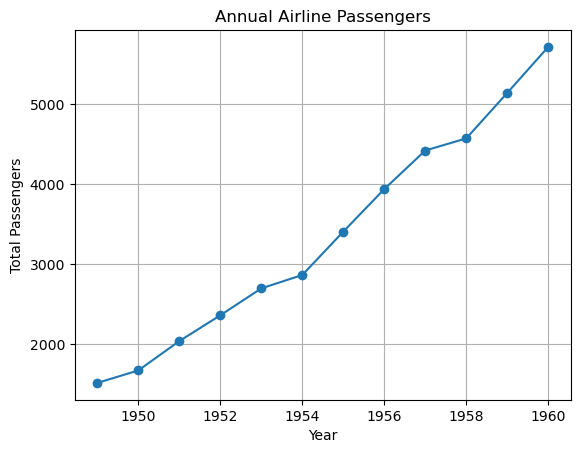

In [5]:
import matplotlib.pyplot as plt

plt.plot(yearly['year'], yearly['passengers'], marker='o')
plt.title("Annual Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers")
plt.grid(True)
plt.show()

## 🧪 Step 4: Hypothesis for Mann-Kendall Test — Explained for Everyone

### What is a Hypothesis Test?

A **hypothesis test** is a statistical method used to decide whether the pattern we see in data is **real** or just a result of **random chance**.

It starts with two assumptions:
- **Null Hypothesis (H₀)**: There's no significant pattern.
- **Alternative Hypothesis (H₁)**: There's a real trend or difference.

Then, based on the data, we calculate a statistic to decide if we should **reject** the null hypothesis.

---

### Mann-Kendall Test: What is It?

The **Mann-Kendall Test** is a **non-parametric** test (meaning it makes no assumption about the data’s distribution) used to detect **monotonic trends** in a time series.

> A **monotonic trend** means the values are consistently increasing or decreasing over time — not necessarily linearly, just consistently.

---

### Why Use Mann-Kendall?

- It's **robust** to missing values and outliers.
- It doesn’t require the data to be normally distributed.
- Very suitable for **environmental and climate data** like rainfall, temperature, streamflow, etc.

---

### The Hypotheses in Mann-Kendall Test

- **H₀ (Null Hypothesis)**: There is **no trend** in the data — values change randomly.
- **H₁ (Alternative Hypothesis)**: There is a **monotonic trend** — either increasing or decreasing.

---

### The Core Idea Behind Mann-Kendall

We calculate a value called **S**, which counts the difference in values for every possible pair of time points.

- For every pair `(i, j)` where `j > i`, we check:
  - If value at `j` > value at `i`, we add `+1`
  - If value at `j` < value at `i`, we add `-1`
  - If equal, we add `0`

This total sum is our **S statistic**. The higher the positive value of **S**, the stronger the increasing trend. A very negative value means a decreasing trend.

---

### How We Interpret the Result

We can calculate a **Z-score** and **p-value** from this S statistic:
- If `p < 0.05` (5% significance level), we **reject the null hypothesis** and conclude a trend **exists**.
- If `p >= 0.05`, the trend might be due to **random chance**.

---

### Example Calculation (Manual)

We now implement this logic with a Python function that manually calculates **S** from the dataset. The next code block will do exactly that.


In [8]:
def mk_test_manual(data):
    n = len(data)
    s = 0
    for k in range(n - 1):
        for j in range(k + 1, n):
            s += (1 if data[j] > data[k] else -1 if data[j] < data[k] else 0)
    return s

mk_stat = mk_test_manual(yearly['passengers'].values)
print("Manual Mann-Kendall Statistic (S):", mk_stat)

Manual Mann-Kendall Statistic (S): 66


## 🧮 Step 5: Use pymannkendall Library
Let’s use the `pymannkendall` library to get the full statistical result.

Install if needed: `!pip install pymannkendall`

In [10]:
import pymannkendall as mk

result = mk.original_test(yearly['passengers'])
print(result)

Mann_Kendall_Test(trend='increasing', h=True, p=8.303107353668793e-06, z=4.45721562860432, Tau=1.0, s=66.0, var_s=212.66666666666666, slope=380.3363636363636, intercept=1045.65)


## 📦 Step 5: Interpreting Output from `pymannkendall` Library

Now that we’ve manually computed the Mann-Kendall statistic `S`, let’s use the `pymannkendall` library to get a **full statistical interpretation** of the trend in your data.

---

### 🔍 What Does `pymannkendall.original_test()` Return?

The function returns several values. Let’s break them down **in plain language**:

| Output | Meaning |
|--------|---------|
| `trend` | This tells you whether the data has a **trend**: `'increasing'`, `'decreasing'`, or `'no trend'`. |
| `h` | This is like a final decision: <br>`True` means a significant trend was found; <br>`False` means it was not. |
| `p` | This is the **p-value** — it tells you **how likely it is** that the trend happened by chance. <br>✔ If `p < 0.05`, we usually consider the trend **statistically significant**. |
| `z` | The **Z-score**, a number that represents how extreme the observed trend is compared to no-trend. Higher absolute values (e.g., > 1.96) suggest stronger evidence of a trend. |
| `Tau` | This is **Kendall's Tau**, a number between -1 and +1 that measures the **strength and direction** of the trend. <br>✔ `+1` is a perfect increasing trend, `-1` is a perfect decreasing trend. |
| `s` | The Mann-Kendall **S statistic** — same as the one we computed manually. |
| `var_s` | The **variance** of `S` under the assumption of no trend. Used for computing Z. |
| `slope` | An estimate of the **rate of change** (per unit time). For example, +20 passengers per year. |
| `intercept` | The estimated starting value if the trend were extended back to year 0. |

---

### 🧠 How to Use These Outputs in Interpretation

Here’s how you’d use them in practice:

- ✅ **Is there a trend?**
  - Check `trend` and `h`
- ✅ **How confident are we?**
  - Look at the `p` value (we often consider a trend significant if `p < 0.05`)
- ✅ **Is the trend strong?**
  - Look at `Tau` and `z`
- ✅ **What’s the real-world impact?**
  - Use `slope` to estimate **how fast** the change is happening

---

### ✅ Example Interpretation:

```python
Mann_Kendall_Test(trend='increasing', h=True, p=0.01, z=2.45, Tau=0.6, s=45.0, var_s=122.0, slope=21.2, intercept=100.5)


## 🧠 Bonus: Seasonal Mann-Kendall Test
You can use `mk.seasonal_test()` if your data has seasonality (e.g. monthly rainfall over years).